## Geração de Dados

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

No conjunto de dados X colocamos os dados das colunas referentes às palavras. Basicamente X são todas as colunas menos a coluna target, definida na linha anterior. Já a variável y conserva apenas os dados do objetivo target.

## Criação de Bolhas de Dados

In [126]:
from sklearn.datasets.samples_generator import make_blobs

n_features = 2
n_samples = 300
n_classes = 6

_X, _y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, cluster_std = 0.5, random_state = 1)

O conjunto de dados $X$ possui dois atributos com valores gerados aleatoriamente

In [127]:
_X[:10]

array([[ -2.16414961,   1.70957037],
       [ -5.96389402,  -3.38868772],
       [ -1.29781801,   4.4090167 ],
       [ -2.00539028,   4.20811311],
       [ -6.5076907 ,  -8.44649007],
       [ -1.51676624,   4.84906045],
       [ -1.57954137,   4.84457433],
       [-10.59734652,  -3.52167589],
       [ -7.21137626,  -2.6284779 ],
       [ -9.41754322,  -3.76860219]])

O vetor de dados $y$ possui o valor das classes (centers).

In [128]:
_y[:10]

array([4, 3, 5, 0, 2, 0, 0, 1, 3, 1])

In [129]:
groups = ['A','B','C','D','E','F']
y_g = [groups[i] for i in _y]

In [130]:
import pandas as pd
data = pd.DataFrame({
    'x1' : _X[:,0], 
    'x2' : _X[:,1], 
    'target' : y_g})

data["target"] = data["target"].astype('category')

In [131]:
data.head()

,x1,x2,target
0,-2.164150,1.709570,E
1,-5.963894,-3.388688,D
2,-1.297818,4.409017,F
3,-2.005390,4.208113,A
4,-6.507691,-8.446490,C


## Visualização dos Dados

(-11.456259034601548,
 -0.037216603956869876,
 -9.657398576081844,
 6.425021673297292)

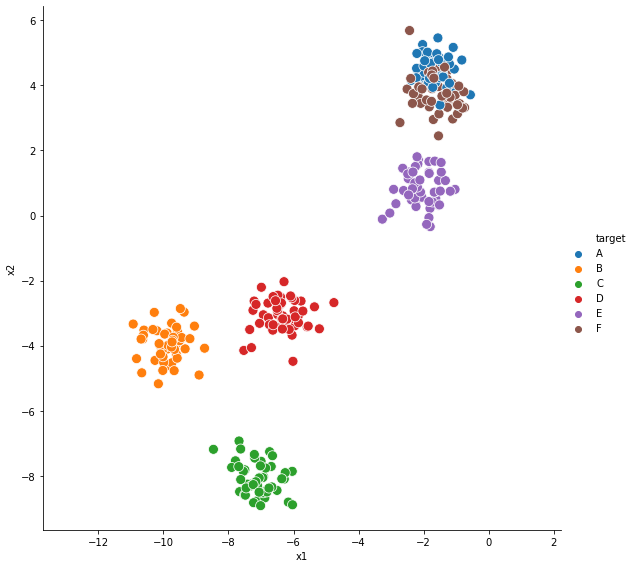

In [132]:
sns.relplot(x='x1', y='x2', hue='target', data = data, height=8, s=100)
plt.axis('equal')

## Escolha do Objetivo e Preparação dos Dados para Indução

Definindo qual é o nome da coluna que é nosso objetivo de predição (classificação)

In [133]:
target = "target"

No conjunto de dados X colocamos os dados das colunas referentes aos atributos. Basicamente X são todas as colunas menos a coluna target, definida na linha anterior. Já a variável y conserva apenas os dados do objetivo target.

In [134]:
X = data.drop([target], axis=1)
y = data[target].factorize()[0]

In [135]:
X.head()

,x1,x2
0,-2.164150,1.709570
1,-5.963894,-3.388688
2,-1.297818,4.409017
3,-2.005390,4.208113
4,-6.507691,-8.446490


In [136]:
y[:6]

array([0, 1, 2, 3, 4, 3], dtype=int64)

## Separação dos Dados em Treino e Teste

Deixamos 25% para teste, a separação será estratificada e a semente é 10.

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=10)

## Definição do Classificador

In [149]:
# Definir o classificador
from sklearn import svm
model = svm.SVC(C=1.0, kernel = "linear", max_iter = 1000)

In [150]:
# Printar o classificador para ver os seus parâmetros
model.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=1000, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Predição do Conjunto de Teste 

In [151]:
y_test_pred = model.predict(X_test)

In [152]:
y_test_pred

array([2, 3, 4, 3, 4, 4, 0, 5, 3, 4, 0, 1, 2, 3, 3, 3, 1, 0, 3, 5, 4, 3,
       5, 5, 3, 1, 3, 1, 5, 4, 0, 2, 3, 1, 0, 1, 1, 0, 0, 4, 3, 0, 2, 0,
       5, 2, 5, 4, 1, 0, 0, 5, 4, 4, 4, 3, 1, 2, 5, 2, 4, 4, 2, 5, 1, 3,
       1, 1, 1, 2, 3, 2, 5, 0, 5], dtype=int64)

## Avaliação da Predição

### Matriz de Confusão

In [153]:
from pandas import crosstab
crosstab(y_test, y_test_pred, rownames = ['y_test'], colnames = ['y_test_pred ->']  )

y_test_pred ->,0,1,2,3,4,5
y_test,,,,,,
0,12,0,0,0,0,0
1,0,13,0,0,0,0
2,0,0,7,5,0,0
3,0,0,3,10,0,0
4,0,0,0,0,13,0
5,0,0,0,0,0,12


Há uma outra forma direta de fazer a matriz de confusão, no entanto não é muito boa de visualizar, pois retorna apenas uma matriz.

In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[12,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0],
       [ 0,  0,  7,  5,  0,  0],
       [ 0,  0,  3, 10,  0,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

### Métrica de Acurácia

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.8933333333333333

### Métricas de Avaliação por Classe: precision, recall e f1-score

In [156]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       0.70      0.58      0.64        12
           3       0.67      0.77      0.71        13
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75



## Visualização das Predições

In [157]:
y

array([0, 1, 2, 3, 4, 3, 3, 5, 1, 5, 3, 2, 3, 2, 4, 4, 1, 0, 5, 0, 4, 3,
       1, 3, 5, 0, 1, 0, 1, 4, 0, 2, 4, 3, 3, 2, 1, 2, 4, 5, 1, 4, 0, 4,
       3, 2, 2, 3, 1, 4, 2, 5, 1, 1, 4, 3, 0, 0, 4, 2, 0, 0, 5, 4, 5, 0,
       3, 2, 3, 3, 2, 1, 5, 0, 1, 3, 3, 3, 4, 5, 4, 1, 3, 0, 4, 5, 4, 5,
       1, 3, 1, 5, 0, 4, 4, 2, 1, 5, 2, 0, 5, 2, 1, 1, 0, 1, 0, 1, 1, 4,
       1, 2, 1, 5, 2, 2, 5, 3, 1, 2, 0, 4, 0, 4, 0, 3, 1, 3, 4, 0, 1, 5,
       1, 3, 2, 5, 0, 0, 4, 1, 4, 5, 5, 2, 0, 0, 1, 4, 1, 1, 5, 5, 2, 4,
       1, 2, 5, 0, 2, 5, 0, 4, 2, 4, 5, 1, 2, 4, 0, 4, 1, 3, 5, 2, 5, 4,
       1, 5, 3, 2, 5, 4, 1, 3, 5, 3, 0, 1, 5, 2, 3, 4, 5, 4, 3, 3, 5, 0,
       4, 2, 4, 3, 5, 3, 3, 1, 3, 4, 3, 5, 2, 2, 4, 0, 2, 5, 0, 2, 2, 4,
       3, 1, 3, 5, 2, 3, 2, 4, 5, 3, 4, 0, 4, 3, 0, 3, 1, 5, 3, 2, 5, 4,
       0, 2, 5, 0, 4, 2, 2, 3, 0, 5, 0, 1, 5, 2, 3, 5, 5, 1, 2, 4, 2, 4,
       5, 1, 2, 3, 1, 0, 3, 3, 4, 4, 0, 0, 3, 0, 2, 2, 5, 0, 0, 0, 5, 2,
       3, 0, 1, 0, 0, 4, 2, 1, 0, 2, 1, 1, 5, 1], d

Text(0.5, 1.0, 'SVM')

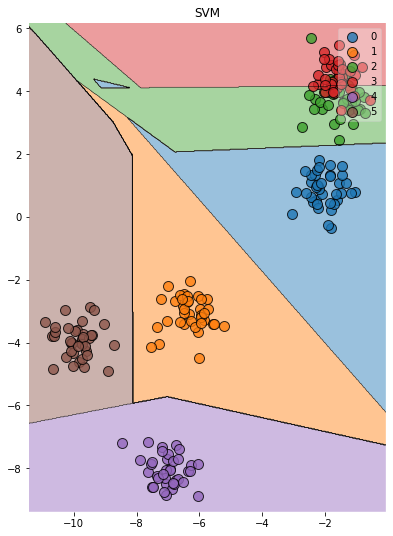

In [158]:
fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X_train.to_numpy(), y_train, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
ax.set_aspect('equal')
ax.set_title('SVM')

Text(0.5, 1.0, 'SVM')

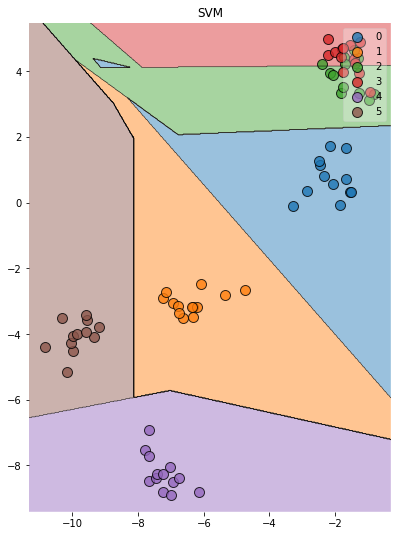

In [159]:
fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X_test.to_numpy(), y_test, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
ax.set_aspect('equal')
ax.set_title('SVM') 